In [1]:
import pandas as pd
import numpy as np

In [2]:
# A melhor forma de encontrar os fatores
# Uma abordagem ou uma metodologia para abordar os fatores
# Teste de associação (qui-quadrado)
# Comece com a correlação: pearson, spearman, kendall e crammer (categorico)... 

## Alunos

In [3]:
#alunos = pd.read_csv("TS_ALUNO_9EF.csv")
#alunos.shape

In [4]:
#alunos.head()

## Professores

In [5]:
#profe = pd.read_csv("TS_PROFESSOR.csv")
#profe.shape

In [6]:
#profe.head()

## Diretores

In [7]:
# ID_REGIAO (NUM) Código da Região [1- Norte, 2 - Nordeste, 3 - Sudeste, 4 - Sul, 5 - Centro-Oeste]
# ID_UF (NUM) [11-RO, 12-AC, 13-AM, 14-RR, 15-PA, 16-AP, 17-TO, 21-MA, 22-PI, 23-CE, 24-RN, 25-PB, 26-PE, 27-AL, 28-SE, 29-BA, 31-MG, 32-ES, 33-RJ, 35-SP, 41-PR, 42-SC, 43-RS, 50-MS, 51-MT, 52-GO, 53-DF]
# ID_MUNICIPIO (NUM) Código do Município
# ID_AREA (NUM) [1 - Capital, 2 - Interior] Área
# ID_ESCOLA (NUM) Código da Escola
# ID_DEPENDENCIA_ADM (NUM) Dependência Administrativa [1 - Federal, 2 - Estadual, 3 - Municipal, 4 - Privada]
# ID_LOCALIZACAO (NUM) Localização [1 - Urbana, 2 - Rural]
# IN_PREENCHIMENTO_QUESTIONARIO (NUM) Indicador de preenchimento do questionário [0 - Não Preenchido, 1 - Preenchido Parcial ou Totalmente]

# 1 - Informações dos Diretores
# TX_RESP_Q001 (CHAR) Qual é a sua cor ou raça? [a,b,c,d,e,f]
# TX_RESP_Q002 (NUM) Por quanto tempo você trabalhou como professor(a) antes de se tornar diretor(a)? Anos (Regra de Validação: Q002 >= 0 e Q002 <= 35)
# TX_RESP_Q004 (NUM) Você possui quanto tempo de experiência como diretor(a) de escola? Anos (Regra de Validação: Q004 >= 0 e Q004 <= 35)
# TX_RESP_Q009 (NUM) Quantas horas você trabalha em uma semana normal em atividades relacionadas à educação?(Regra de Validação: Q009 >= 0 e Q009 <= 70)
# TX_RESP_Q012 (NUM) Em uma semana normal de trabalho, quantas horas você costuma gastar, aproximadamente, com as seguintes atividades para esta escola: Reunião com professores(as) (Regra de Validação: Q012 >= 0 e Q012 <= 20)
# TX_RESP_Q013 (NUM) Em uma semana normal de trabalho, quantas horas você costuma gastar, aproximadamente, com as seguintes atividades para esta escola: Atendimento aos pais ou responsáveis (Regra de Validação: Q013 >= 0 e Q013 <= 30) OK
# TX_RESP_Q015 (NUM) Em uma semana normal de trabalho, quantas horas você costuma gastar, aproximadamente, com as seguintes atividades para esta escola: Atendimento aos(às) alunos(as) (Regra de Validação: Q015 >= 0 e Q015 <= 30)

# 5 - Gestão Pedagógica
# TX_RESP_Q158 (CHAR) A escola possui Projeto Político-Pedagógico? [a,b]
# TX_RESP_Q163 (CHAR) Estabelece metas de aprendizagem? (Regra de Dependência: somente será preenchida caso Q158 seja igual a "A") [a,b]

# TX_RESP_Q224 (CHAR) Indique se neste ano a escola ofereceu atividades de formação nas seguintes áreas: Avaliação da aprendizagem. [a,b]
# TX_RESP_Q225 (CHAR) Indique se neste ano a escola ofereceu atividades de formação nas seguintes áreas: Avaliação em larga escala. [a,b]


In [8]:
dir = pd.read_csv("TS_DIRETOR.csv")
dir = dir.loc[:, ["ID_ESCOLA", "ID_DEPENDENCIA_ADM", "TX_RESP_Q002", "TX_RESP_Q004", "TX_RESP_Q009", "TX_RESP_Q012", "TX_RESP_Q013", "TX_RESP_Q158", "TX_RESP_Q163", "TX_RESP_Q224", "TX_RESP_Q225"]]
dir.shape

(74176, 11)

In [9]:
dir.head()

,ID_ESCOLA,ID_DEPENDENCIA_ADM,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q009,TX_RESP_Q012,TX_RESP_Q013,TX_RESP_Q158,TX_RESP_Q163,TX_RESP_Q224,TX_RESP_Q225
0,11024666,3,18.0,0.0,40.0,2.0,2.0,A,A,A,B
1,11024682,2,14.0,11.0,50.0,2.0,10.0,A,A,A,A
2,11024828,3,5.0,4.0,40.0,2.0,2.0,A,A,A,A
3,11024968,2,5.0,0.0,40.0,2.0,4.0,A,A,A,A
4,11025077,3,9.0,NaN,40.0,2.0,4.0,A,A,B,B


## Escolas

In [10]:
# ID_REGIAO (NUM) Código da Região [1- Norte, 2 - Nordeste, 3 - Sudeste, 4 - Sul, 5 - Centro-Oeste]
# ID_UF (NUM) [11-RO, 12-AC, 13-AM, 14-RR, 15-PA, 16-AP, 17-TO, 21-MA, 22-PI, 23-CE, 24-RN, 25-PB, 26-PE, 27-AL, 28-SE, 29-BA, 31-MG, 32-ES, 33-RJ, 35-SP, 41-PR, 42-SC, 43-RS, 50-MS, 51-MT, 52-GO, 53-DF]
# ID_MUNICIPIO (NUM) Código do Município
# ID_AREA (NUM) [1 - Capital, 2 - Interior] Área
# ID_ESCOLA (NUM) Código da Escola


# ID_DEPENDENCIA_ADM (NUM) Dependência Administrativa [1 - Federal, 2 - Estadual, 3 - Municipal, 4 - Privada]
# ID_LOCALIZACAO (NUM) Localização [1 - Urbana, 2 - Rural]
# PC_FORMACAO_DOCENTE_FINAL (NUM) Indicador de Adequação da Formação Docente (Informação referente ao Grupo 1, para os Anos Finais do EF)
# NIVEL_SOCIO_ECONOMICO (CHAR) Indicador de Nível Socioeconômico (Inse) [Nivel I, Nivel II, Nivel III, Nivel VI, Nivel V, Nivel VI, Nivel VII]

# Nivel_0_LP9 (NUM) (0, 200)
# Nivel_1_LP9 (NUM) (200, 225)
# Nivel_2_LP9 (NUM) (225, 250)
# Nivel_3_LP9 (NUM) (250, 275)
# Nivel_4_LP9 (NUM) (275, 300)
# Nivel_5_LP9 (NUM) (300, 325)
# Nivel_6_LP9 (NUM) (325, 350)
# Nivel_7_LP9 (NUM) (350, 375)
# Nivel_8_LP9 (NUM) (375, +)
# Nivel_0_MT9 (NUM) (0, 200)
# Nivel_1_MT9 (NUM) (200, 225)
# Nivel_2_MT9 (NUM) (225, 250)
# Nivel_3_MT9 (NUM) (250, 275)
# Nivel_4_MT9 (NUM) (275, 300)
# Nivel_5_MT9 (NUM) (300, 325)
# Nivel_6_MT9 (NUM) (325, 350)
# Nivel_7_MT9 (NUM) (350, 375)
# Nivel_8_MT9 (NUM) (375, 400)
# Nivel_9_MT9 (NUM) (400, +)

# MEDIA_9EF_LP (NUM) Média em Língua Portuguesa 9º ano
# MEDIA_9EF_MT (NUM) Média em Matemática 9º ano
 

In [11]:
esc = pd.read_csv("TS_ESCOLA.csv", encoding = "ISO-8859-1", engine='python')
esc = esc.loc[:, ["ID_ESCOLA", "ID_DEPENDENCIA_ADM", "NIVEL_SOCIO_ECONOMICO", "MEDIA_9EF_LP", "MEDIA_9EF_MT"]]
esc.shape

(70606, 5)

In [12]:
esc.head()

,ID_ESCOLA,ID_DEPENDENCIA_ADM,NIVEL_SOCIO_ECONOMICO,MEDIA_9EF_LP,MEDIA_9EF_MT
0,11024666,3,Nível IV,NaN,NaN
1,11024682,2,Nível IV,NaN,NaN
2,11024828,3,Nível IV,239.76,244.94
3,11024968,2,Nível IV,NaN,NaN
4,11025077,3,Nível IV,NaN,NaN


## Juntando Diretores e Escolas

In [13]:
diresc = pd.merge(dir, esc, how = 'inner', on = 'ID_ESCOLA')
diresc.shape

(71448, 15)

In [14]:
diresc.head()

,ID_ESCOLA,ID_DEPENDENCIA_ADM_x,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q009,TX_RESP_Q012,TX_RESP_Q013,TX_RESP_Q158,TX_RESP_Q163,TX_RESP_Q224,TX_RESP_Q225,ID_DEPENDENCIA_ADM_y,NIVEL_SOCIO_ECONOMICO,MEDIA_9EF_LP,MEDIA_9EF_MT
0,11024666,3,18.0,0.0,40.0,2.0,2.0,A,A,A,B,3,Nível IV,NaN,NaN
1,11024682,2,14.0,11.0,50.0,2.0,10.0,A,A,A,A,2,Nível IV,NaN,NaN
2,11024828,3,5.0,4.0,40.0,2.0,2.0,A,A,A,A,3,Nível IV,239.76,244.94
3,11024968,2,5.0,0.0,40.0,2.0,4.0,A,A,A,A,2,Nível IV,NaN,NaN
4,11025077,3,9.0,NaN,40.0,2.0,4.0,A,A,B,B,3,Nível IV,NaN,NaN


In [15]:
diresc["NIVEL_SOCIO_ECONOMICO"].value_counts()

Nível V      19386
Nível IV     19350
Nível III    17657
Nível II      8305
Nível VI      4810
Nível VII      151
Nível I         46
Name: NIVEL_SOCIO_ECONOMICO, dtype: int64

In [16]:
diresc.describe()

,ID_ESCOLA,ID_DEPENDENCIA_ADM_x,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q009,TX_RESP_Q012,TX_RESP_Q013,ID_DEPENDENCIA_ADM_y,MEDIA_9EF_LP,MEDIA_9EF_MT
count,7.144800e+04,71448.000000,63619.000000,60355.000000,62161.000000,63571.000000,63015.000000,71448.000000,30123.000000,30123.000000
mean,3.445145e+07,2.616952,13.868011,6.382056,42.960216,3.654119,5.462509,2.616952,252.720845,255.237052
std,1.318977e+07,0.501300,7.425015,5.789504,11.476747,2.655558,4.403569,0.501300,21.533358,23.734642
min,1.100020e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,150.720000,152.880000
25%,2.509222e+07,2.000000,8.000000,2.000000,40.000000,2.000000,3.000000,2.000000,239.110000,240.130000
50%,3.203256e+07,3.000000,14.000000,5.000000,40.000000,3.000000,4.000000,3.000000,253.700000,255.220000
75%,4.137217e+07,3.000000,19.000000,9.000000,50.000000,4.000000,6.000000,3.000000,266.980000,270.155000
max,6.132367e+07,3.000000,35.000000,35.000000,70.000000,20.000000,30.000000,3.000000,356.010000,373.220000


In [17]:
diresc.drop(diresc[diresc["MEDIA_9EF_LP"] == 0.0].index, inplace=True)
diresc.drop(diresc[diresc["MEDIA_9EF_MT"] == 0.0].index, inplace=True)
diresc.shape

(71448, 15)

In [18]:
diresc.describe()

,ID_ESCOLA,ID_DEPENDENCIA_ADM_x,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q009,TX_RESP_Q012,TX_RESP_Q013,ID_DEPENDENCIA_ADM_y,MEDIA_9EF_LP,MEDIA_9EF_MT
count,7.144800e+04,71448.000000,63619.000000,60355.000000,62161.000000,63571.000000,63015.000000,71448.000000,30123.000000,30123.000000
mean,3.445145e+07,2.616952,13.868011,6.382056,42.960216,3.654119,5.462509,2.616952,252.720845,255.237052
std,1.318977e+07,0.501300,7.425015,5.789504,11.476747,2.655558,4.403569,0.501300,21.533358,23.734642
min,1.100020e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,150.720000,152.880000
25%,2.509222e+07,2.000000,8.000000,2.000000,40.000000,2.000000,3.000000,2.000000,239.110000,240.130000
50%,3.203256e+07,3.000000,14.000000,5.000000,40.000000,3.000000,4.000000,3.000000,253.700000,255.220000
75%,4.137217e+07,3.000000,19.000000,9.000000,50.000000,4.000000,6.000000,3.000000,266.980000,270.155000
max,6.132367e+07,3.000000,35.000000,35.000000,70.000000,20.000000,30.000000,3.000000,356.010000,373.220000


In [19]:
diresc.isnull().sum()

ID_ESCOLA                    0
ID_DEPENDENCIA_ADM_x         0
TX_RESP_Q002              7829
TX_RESP_Q004             11093
TX_RESP_Q009              9287
TX_RESP_Q012              7877
TX_RESP_Q013              8433
TX_RESP_Q158              5735
TX_RESP_Q163              9242
TX_RESP_Q224              5948
TX_RESP_Q225              7368
ID_DEPENDENCIA_ADM_y         0
NIVEL_SOCIO_ECONOMICO     1743
MEDIA_9EF_LP             41325
MEDIA_9EF_MT             41325
dtype: int64

In [20]:
diresc.dropna(axis=0, inplace=True)
diresc.drop_duplicates(keep='last', inplace=True)
diresc.shape

(22027, 15)

In [21]:
diresc = diresc[diresc["ID_DEPENDENCIA_ADM_y"] != 4]
diresc.shape

(22027, 15)

In [22]:
diresc.drop(columns=["ID_DEPENDENCIA_ADM_x", "ID_DEPENDENCIA_ADM_y"], axis=1, inplace=True)

In [23]:
escala = [
    (diresc["MEDIA_9EF_MT"] < 200),
    (diresc["MEDIA_9EF_MT"] >= 200) & (diresc["MEDIA_9EF_MT"] < 225),
    (diresc["MEDIA_9EF_MT"] >= 225) & (diresc["MEDIA_9EF_MT"] < 250),
    (diresc["MEDIA_9EF_MT"] >= 250) & (diresc["MEDIA_9EF_MT"] < 275),
    (diresc["MEDIA_9EF_MT"] >= 275) & (diresc["MEDIA_9EF_MT"] < 300),
    (diresc["MEDIA_9EF_MT"] >= 300) & (diresc["MEDIA_9EF_MT"] < 325),
    (diresc["MEDIA_9EF_MT"] >= 325) & (diresc["MEDIA_9EF_MT"] < 350),
    (diresc["MEDIA_9EF_MT"] >= 350) & (diresc["MEDIA_9EF_MT"] < 375),
    (diresc["MEDIA_9EF_MT"] >= 375) & (diresc["MEDIA_9EF_MT"] < 400),
    (diresc["MEDIA_9EF_MT"] >= 400)
    ]
nivel = ["Nivel 0", "Nivel 1", "Nivel 2", "Nivel 3", "Nivel 4", "Nivel 5", "Nivel 6", "Nivel 7", "Nivel 8", "Nivel 9"]
diresc["ESCALA_MT"] = np.select(escala, nivel)

In [24]:
escala = [
    (diresc["MEDIA_9EF_LP"] < 200),
    (diresc["MEDIA_9EF_LP"] >= 200) & (diresc["MEDIA_9EF_LP"] < 225),
    (diresc["MEDIA_9EF_LP"] >= 225) & (diresc["MEDIA_9EF_LP"] < 250),
    (diresc["MEDIA_9EF_LP"] >= 250) & (diresc["MEDIA_9EF_LP"] < 275),
    (diresc["MEDIA_9EF_LP"] >= 275) & (diresc["MEDIA_9EF_LP"] < 300),
    (diresc["MEDIA_9EF_LP"] >= 300) & (diresc["MEDIA_9EF_LP"] < 325),
    (diresc["MEDIA_9EF_LP"] >= 325) & (diresc["MEDIA_9EF_LP"] < 350),
    (diresc["MEDIA_9EF_LP"] >= 350) & (diresc["MEDIA_9EF_LP"] < 375),
    (diresc["MEDIA_9EF_LP"] >= 375)
    ]
nivel = ["Nivel 0", "Nivel 1", "Nivel 2", "Nivel 3", "Nivel 4", "Nivel 5", "Nivel 6", "Nivel 7", "Nivel 8"]
diresc["ESCALA_LP"] = np.select(escala, nivel)

In [25]:
diresc["ESCALA_LP"].value_counts()

Nivel 3    10006
Nivel 2     7043
Nivel 4     3033
Nivel 1     1554
Nivel 5      247
Nivel 0      128
Nivel 6       15
Nivel 7        1
Name: ESCALA_LP, dtype: int64

In [26]:
diresc["ESCALA_MT"].value_counts()

Nivel 3    9400
Nivel 2    6655
Nivel 4    3685
Nivel 1    1432
Nivel 5     598
Nivel 0     129
Nivel 6      99
Nivel 7      29
Name: ESCALA_MT, dtype: int64

In [27]:
diresc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22027 entries, 2 to 71353
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_ESCOLA              22027 non-null  int64  
 1   TX_RESP_Q002           22027 non-null  float64
 2   TX_RESP_Q004           22027 non-null  float64
 3   TX_RESP_Q009           22027 non-null  float64
 4   TX_RESP_Q012           22027 non-null  float64
 5   TX_RESP_Q013           22027 non-null  float64
 6   TX_RESP_Q158           22027 non-null  object 
 7   TX_RESP_Q163           22027 non-null  object 
 8   TX_RESP_Q224           22027 non-null  object 
 9   TX_RESP_Q225           22027 non-null  object 
 10  NIVEL_SOCIO_ECONOMICO  22027 non-null  object 
 11  MEDIA_9EF_LP           22027 non-null  float64
 12  MEDIA_9EF_MT           22027 non-null  float64
 13  ESCALA_MT              22027 non-null  object 
 14  ESCALA_LP              22027 non-null  object 
dtypes:

In [28]:
diresc["TX_RESP_Q158"] = diresc["TX_RESP_Q158"].astype("category")
diresc["TX_RESP_Q163"] = diresc["TX_RESP_Q163"].astype("category")
diresc["TX_RESP_Q224"] = diresc["TX_RESP_Q224"].astype("category")
diresc["TX_RESP_Q225"] = diresc["TX_RESP_Q225"].astype("category")

diresc["NIVEL_SOCIO_ECONOMICO"] = diresc["NIVEL_SOCIO_ECONOMICO"].astype("category")
diresc["ESCALA_LP"] = diresc["ESCALA_LP"].astype("category")
diresc["ESCALA_MT"] = diresc["ESCALA_MT"].astype("category")

In [29]:
diresc = diresc.iloc[:,:].reset_index(drop=True)
diresc.shape

(22027, 15)

In [30]:
diresc.head()

,ID_ESCOLA,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q009,TX_RESP_Q012,TX_RESP_Q013,TX_RESP_Q158,TX_RESP_Q163,TX_RESP_Q224,TX_RESP_Q225,NIVEL_SOCIO_ECONOMICO,MEDIA_9EF_LP,MEDIA_9EF_MT,ESCALA_MT,ESCALA_LP
0,11024828,5.0,4.0,40.0,2.0,2.0,A,A,A,A,Nível IV,239.76,244.94,Nivel 2,Nivel 2
1,11025280,20.0,4.0,40.0,1.0,3.0,A,A,B,B,Nível IV,240.09,241.78,Nivel 2,Nivel 2
2,11025310,7.0,9.0,40.0,1.0,1.0,A,A,A,A,Nível III,276.42,265.14,Nivel 3,Nivel 4
3,11025638,23.0,7.0,40.0,1.0,2.0,A,A,A,A,Nível IV,268.37,273.59,Nivel 3,Nivel 3
4,11006773,12.0,16.0,40.0,4.0,4.0,A,A,A,A,Nível IV,251.32,257.19,Nivel 3,Nivel 3


In [31]:
diresc.describe()

,ID_ESCOLA,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q009,TX_RESP_Q012,TX_RESP_Q013,MEDIA_9EF_LP,MEDIA_9EF_MT
count,2.202700e+04,22027.000000,22027.000000,22027.000000,22027.000000,22027.000000,22027.000000,22027.000000
mean,3.164758e+07,13.848277,6.450447,43.651019,3.596677,5.561947,254.576463,257.256166
std,9.517783e+06,7.296794,5.912298,11.508126,2.462770,4.218410,20.452197,22.716600
min,1.100026e+07,0.000000,0.000000,0.000000,0.000000,0.000000,168.800000,175.670000
25%,2.464917e+07,8.000000,2.000000,40.000000,2.000000,3.000000,241.430000,242.570000
50%,3.118469e+07,14.000000,4.000000,40.000000,3.000000,5.000000,255.210000,256.850000
75%,3.590861e+07,19.000000,9.000000,50.000000,4.000000,7.000000,268.090000,271.410000
max,5.306821e+07,35.000000,35.000000,70.000000,20.000000,30.000000,356.010000,372.100000


In [32]:
#diresc.drop(diresc[diresc["MEDIA_3EM_LP"] < 225].index, axis=0, inplace=True)
#diresc.drop(diresc[diresc["MEDIA_3EM_LP"] >= 350].index, axis=0, inplace=True)
#diresc.drop(diresc[diresc["MEDIA_3EM_MT"] < 225].index, axis=0, inplace=True)
#diresc.drop(diresc[diresc["MEDIA_3EM_MT"] >= 350].index, axis=0, inplace=True)
#diresc.shape

In [33]:
por = diresc.drop(columns=["ID_ESCOLA", "MEDIA_9EF_MT", "ESCALA_MT", "ESCALA_LP"], axis=1)
por.drop(por[por["MEDIA_9EF_LP"] < 200].index, axis=0, inplace=True)
por.shape

(21899, 11)

In [34]:
por.head()

,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q009,TX_RESP_Q012,TX_RESP_Q013,TX_RESP_Q158,TX_RESP_Q163,TX_RESP_Q224,TX_RESP_Q225,NIVEL_SOCIO_ECONOMICO,MEDIA_9EF_LP
0,5.0,4.0,40.0,2.0,2.0,A,A,A,A,Nível IV,239.76
1,20.0,4.0,40.0,1.0,3.0,A,A,B,B,Nível IV,240.09
2,7.0,9.0,40.0,1.0,1.0,A,A,A,A,Nível III,276.42
3,23.0,7.0,40.0,1.0,2.0,A,A,A,A,Nível IV,268.37
4,12.0,16.0,40.0,4.0,4.0,A,A,A,A,Nível IV,251.32


In [35]:
por.describe()

,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q009,TX_RESP_Q012,TX_RESP_Q013,MEDIA_9EF_LP
count,21899.000000,21899.000000,21899.000000,21899.000000,21899.000000,21899.000000
mean,13.858898,6.458194,43.667199,3.595552,5.566967,254.938051
std,7.296977,5.916738,11.513359,2.458764,4.215204,19.949252
min,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,8.000000,2.000000,40.000000,2.000000,3.000000,241.750000
50%,14.000000,4.000000,40.000000,3.000000,5.000000,255.370000
75%,19.000000,9.000000,50.000000,4.000000,7.000000,268.150000
max,35.000000,35.000000,70.000000,20.000000,30.000000,356.010000


In [36]:
mat = diresc.drop(columns=["ID_ESCOLA", "MEDIA_9EF_LP", "ESCALA_LP"], axis=1)
mat.drop(mat[mat["MEDIA_9EF_MT"] < 200].index, axis=0, inplace=True)
mat.drop(columns=["MEDIA_9EF_MT"], axis=1, inplace=True)
mat.shape

(21898, 11)

In [37]:
mat.head()

,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q009,TX_RESP_Q012,TX_RESP_Q013,TX_RESP_Q158,TX_RESP_Q163,TX_RESP_Q224,TX_RESP_Q225,NIVEL_SOCIO_ECONOMICO,ESCALA_MT
0,5.0,4.0,40.0,2.0,2.0,A,A,A,A,Nível IV,Nivel 2
1,20.0,4.0,40.0,1.0,3.0,A,A,B,B,Nível IV,Nivel 2
2,7.0,9.0,40.0,1.0,1.0,A,A,A,A,Nível III,Nivel 3
3,23.0,7.0,40.0,1.0,2.0,A,A,A,A,Nível IV,Nivel 3
4,12.0,16.0,40.0,4.0,4.0,A,A,A,A,Nível IV,Nivel 3


In [38]:
mat.describe()

,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q009,TX_RESP_Q012,TX_RESP_Q013
count,21898.000000,21898.000000,21898.000000,21898.000000,21898.000000
mean,13.855649,6.457256,43.668235,3.596356,5.565714
std,7.295205,5.918710,11.506682,2.458991,4.211330
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,2.000000,40.000000,2.000000,3.000000
50%,14.000000,4.000000,40.000000,3.000000,5.000000
75%,19.000000,9.000000,50.000000,4.000000,7.000000
max,35.000000,35.000000,70.000000,20.000000,30.000000


In [39]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in mat.columns:
    data_encoded[i]=label.fit_transform(mat[i])

In [40]:
data_encoded.head()

,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q009,TX_RESP_Q012,TX_RESP_Q013,TX_RESP_Q158,TX_RESP_Q163,TX_RESP_Q224,TX_RESP_Q225,NIVEL_SOCIO_ECONOMICO,ESCALA_MT
0,5,4,39,2,2,0,0,0,0,3,1
1,20,4,39,1,3,0,0,1,1,3,1
2,7,9,39,1,1,0,0,0,0,2,2
3,23,7,39,1,2,0,0,0,0,3,2
4,12,16,39,4,4,0,0,0,0,3,2


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

## Pearson

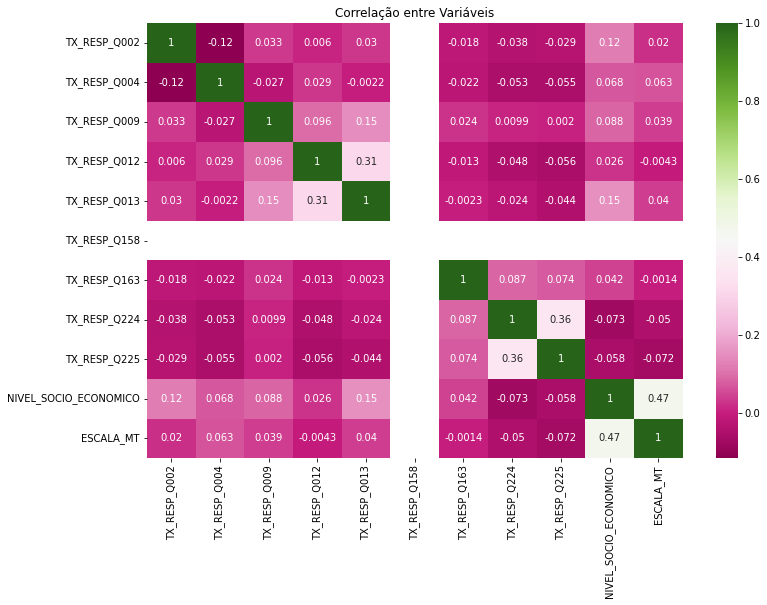

In [42]:
# Verificando a correlação entre as váriaveis 

plt.figure(figsize=(12,8))
sns.heatmap(data_encoded.corr(method="pearson"), annot=True, cmap="PiYG")
plt.title("Correlação entre Variáveis")
plt.show()

## Spearman

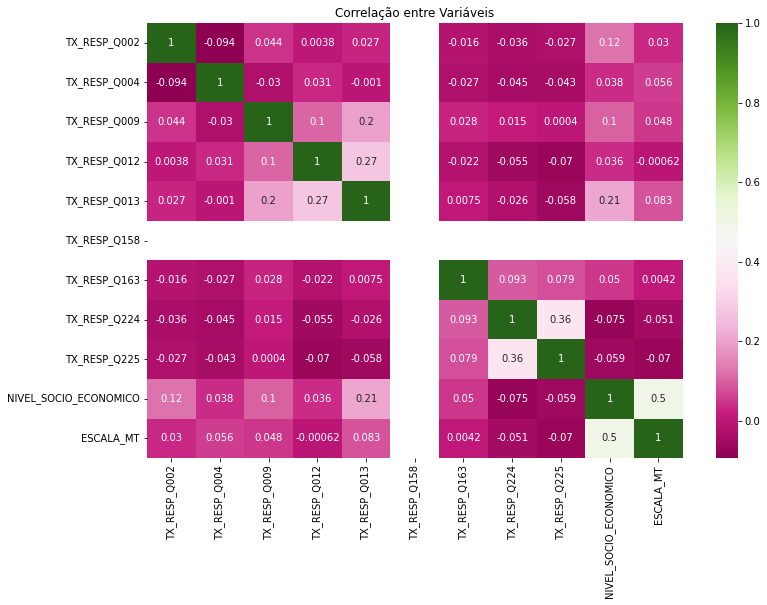

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(data_encoded.corr(method="spearman"), annot=True, cmap="PiYG")
plt.title("Correlação entre Variáveis")
plt.show()

## Kendall

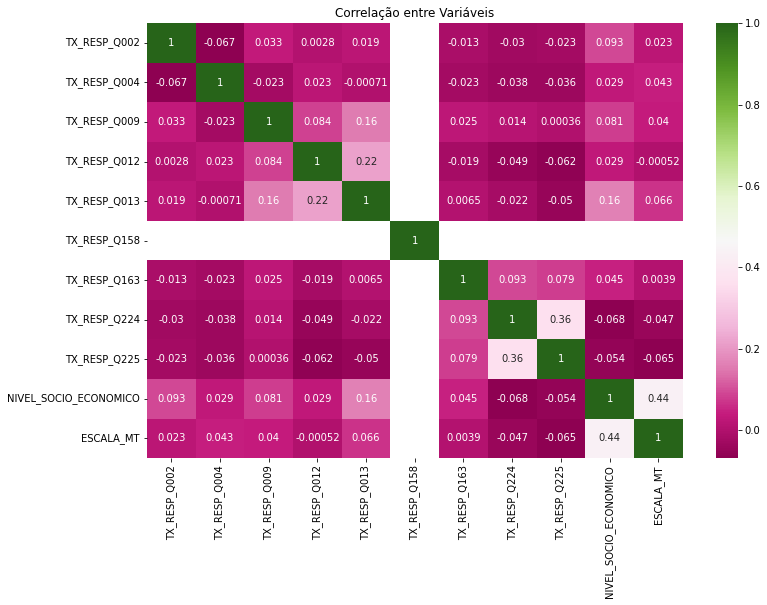

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(data_encoded.corr(method='kendall'), annot=True, cmap="PiYG")
plt.title("Correlação entre Variáveis")
plt.show()